In [65]:
import pandas as pd

# Try reading the CSV file with a different encoding
df = pd.read_csv('spam.csv', encoding='latin1')

# Display a random sample of 5 rows from the DataFrame
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5149,ham,Pls call me da. What happen.,NaN,NaN,NaN
3445,ham,"Mon okie lor... Haha, best is cheap n gd food ...",NaN,NaN,NaN
4793,ham,Sorry that was my uncle. I.ll keep in touch,NaN,NaN,NaN
4676,ham,Wewa is 130. Iriver 255. All 128 mb.,NaN,NaN,NaN
1340,ham,Might ax well im there.,NaN,NaN,NaN


In [66]:
df.shape


(5572, 5)

In [67]:
#1.Data cleaning
#2.EDA
#3.Text Prepocessing
#4.Model building
#5.Evaluation
#6.Improvement

## 1. Data Cleaning

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [69]:
# drop the colunms
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [70]:
print(df.sample(5))

       v1                                                 v2
1554  ham                    Yeah we do totes. When u wanna?
3584  ham  Heart is empty without love.. Mind is empty wi...
3581  ham  You are right. Meanwhile how's project twins c...
3507  ham  Camera quite good, 10.1mega pixels, 3optical a...
561   ham                   Thanx 4 e brownie it's v nice...


In [71]:
#rename
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
978,ham,Hey you can pay. With salary de. Only &lt;#&g...
239,spam,U 447801259231 have a secret admirer who is lo...
816,ham,"He has lots of used ones babe, but the model d..."
293,ham,Are you this much buzy
5174,ham,Water logging in desert. Geoenvironmental impl...


In [72]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,text
313,0,"Hi the way I was with u 2day, is the normal wa..."
1384,0,"Storming msg: Wen u lift d phne, u say \HELLO\..."
4356,0,"HELLOGORGEOUS, HOWS U? MY FONE WAS ON CHARGE L..."
4409,0,You also didnt get na hi hi hi hi hi
1400,0,"No, I decided that only people who care about ..."


In [73]:
df.head()
df.isnull().sum()

target    0
text      0
dtype: int64

In [74]:
df.duplicated().sum()

403

In [75]:
df=df.drop_duplicates(keep='first')

In [76]:
df.shape

(5169, 2)

## 2. EDA

In [77]:
df.head()
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

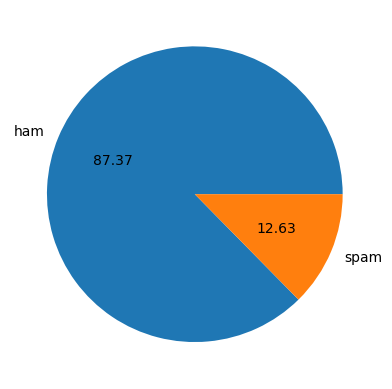

In [78]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [79]:
# data is imbalance
!pip install nltk

In [80]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aadit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
df['num_characters']=df['text'].apply(len)

In [82]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [83]:
# number of word
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [84]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [85]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [86]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [87]:
#ham msg
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [88]:
# spam msg
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [159]:
import seaborn as sns
!pip install seaborn

<Axes: xlabel='num_characters', ylabel='Count'>

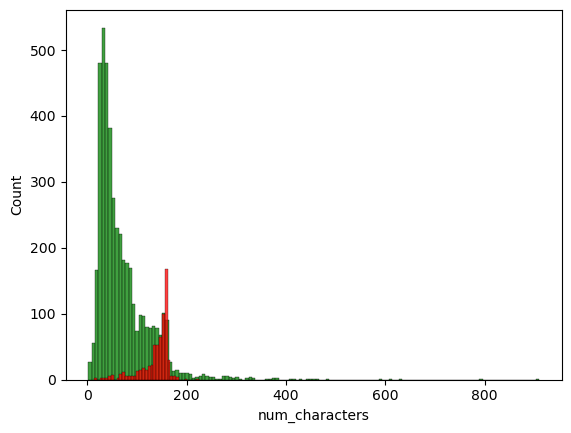

In [90]:
sns.histplot(df[df['target']==0]['num_characters'],color='green')
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

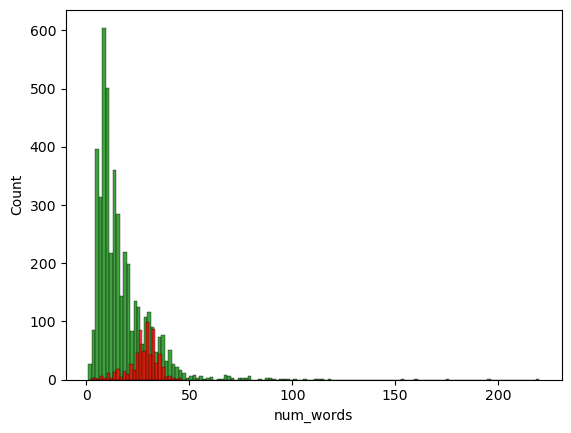

In [91]:
sns.histplot(df[df['target']==0]['num_words'],color='green')
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

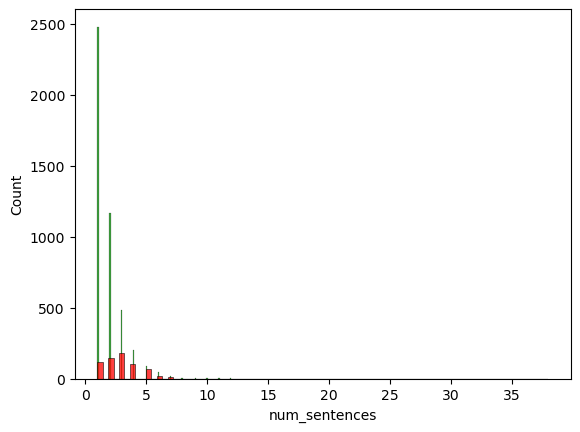

In [92]:
sns.histplot(df[df['target']==0]['num_sentences'],color='green')
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

C:\Users\aadit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


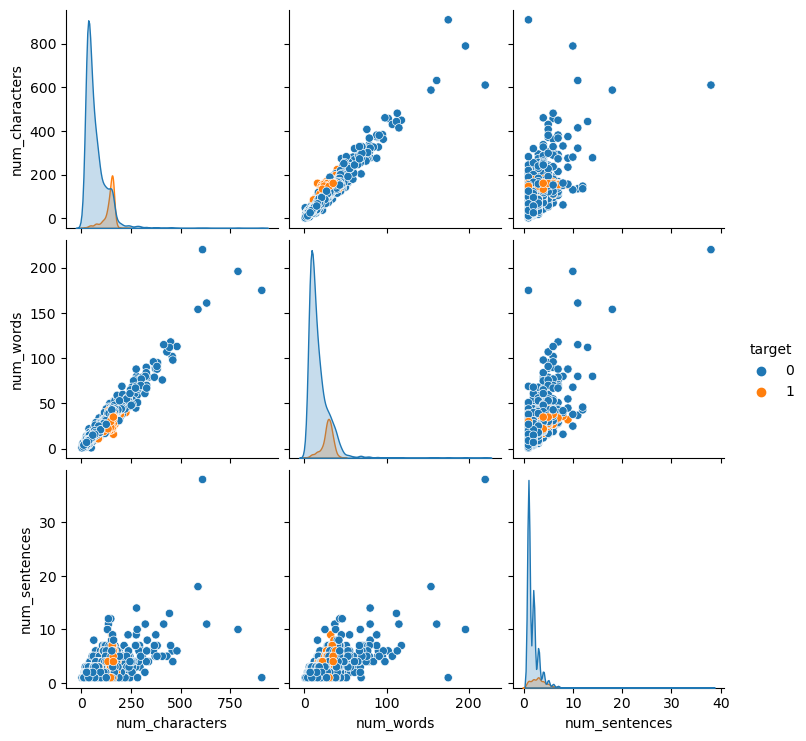

In [93]:
sns.pairplot(df,hue='target')

## 3. Data Prepossing

In [116]:
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# def transform_text(text):
#     text= text.lower()
#     text = nltk.word_tokenize(text)
#     y =[]
#     for i in text:
#         if i.isalnum():
#             y.append(i)
            
#     text = y[:]
#     y.clear()
    
#     for i in text:
#         if i not in stopwords.words('english') and i not in string.punctuation:
#             y.append(i)
            
#     return y
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Uncomment if you haven't downloaded these NLTK resources yet
# nltk.download('punkt')
# nltk.download('stopwords')

def transform_text(text):
    ps = PorterStemmer()
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalnum()]
    stopwords_list = stopwords.words('english')
    words = [word for word in words if word not in stopwords_list and word not in string.punctuation]
    stemmed_words = [ps.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Example usage:
input_text = "This is a sample sentence, showing the transformation of text."
transformed_text = transform_text(input_text)
print(transformed_text)


sampl sentenc show transform text


In [95]:
transform_text('hi aaditya  he is aakash How are You @# ?')

'hi aaditya aakash'

In [96]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [97]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [117]:
df['transform_text'] = df['text'].apply(transform_text)

In [118]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though


In [119]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [120]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

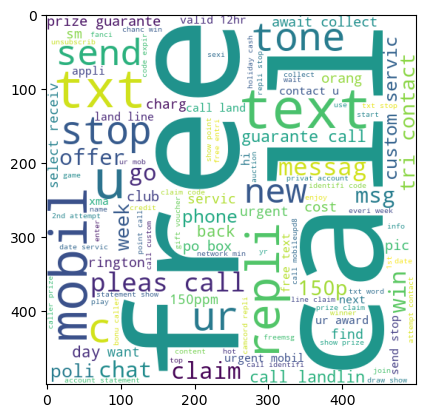

In [121]:
plt.imshow(spam_wc)

In [122]:
ham_wc=wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


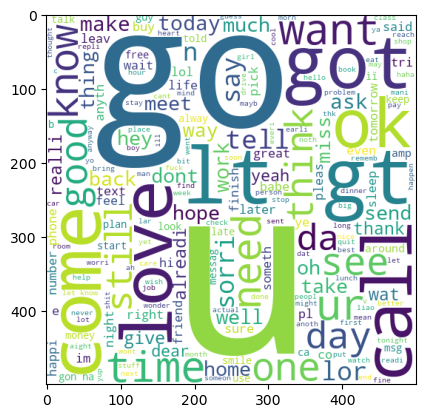

In [123]:
plt.imshow(ham_wc)

In [124]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though


In [125]:
df.columns = df.columns.str.strip()

In [177]:
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)        
        


In [178]:
len(spam_corpus)

9939

In [179]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

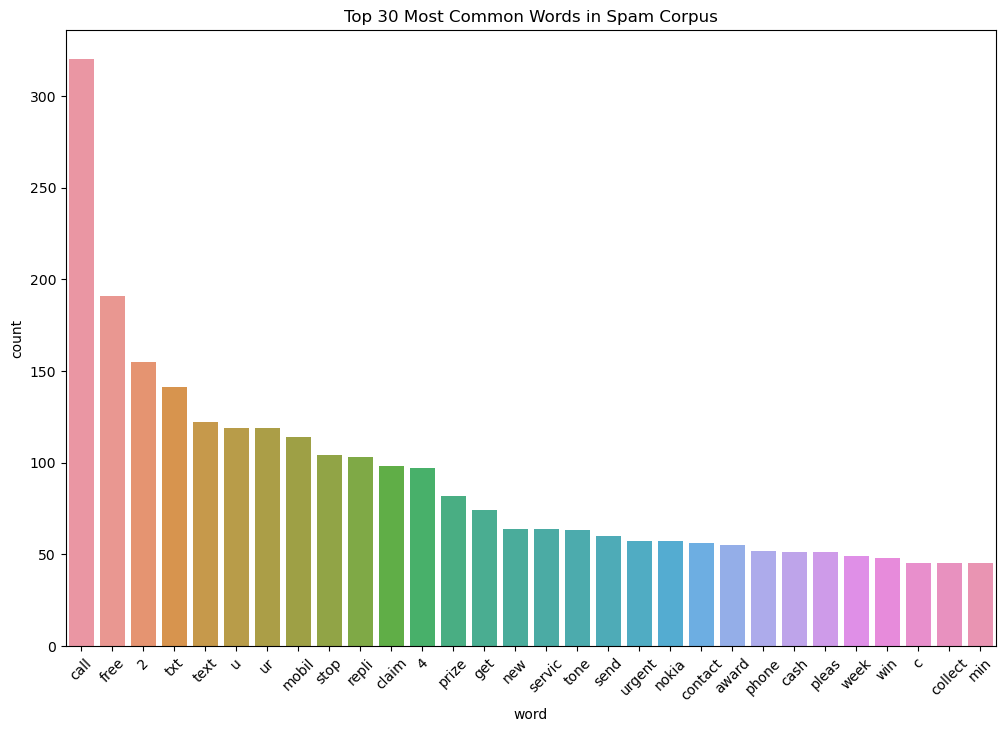

In [180]:
word_counts = Counter(spam_corpus)

# Convert the Counter object to a DataFrame
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['word', 'count'])

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='word', y='count', data=word_counts_df)
plt.xticks(rotation=45)
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.show()

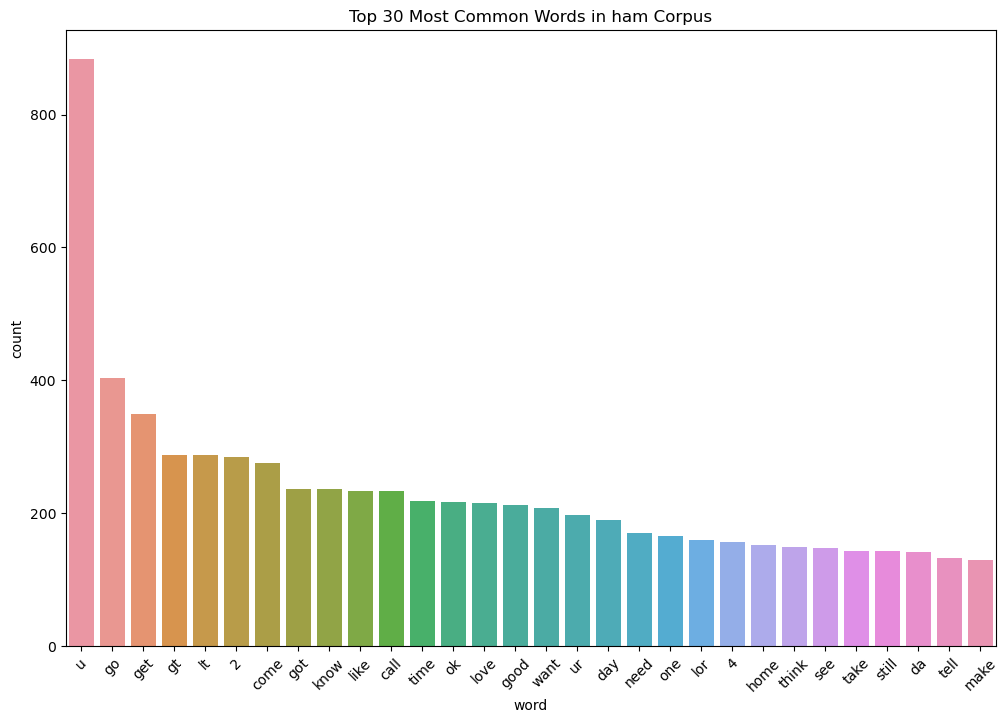

,target,text,num_characters,num_words,num_sentences,transformed_text,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though


In [183]:
word_counts = Counter(ham_corpus)

# Convert the Counter object to a DataFrame
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['word', 'count'])

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='word', y='count', data=word_counts_df)
plt.xticks(rotation=45)
plt.title('Top 30 Most Common Words in ham Corpus')
plt.show()
df.head()

## 4. Model Building

In [184]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()